# Laboratory 21: Linear Regression | Intervals, Errors, Metrics


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

![](https://live.staticflickr.com/4028/4636032975_df7f27eac9_b.jpg) <br>


## Last week, we talked about linear regression ... <br>

![](https://miro.medium.com/max/888/1*guak1sQTh5sAf46NMzbQig.jpeg) <br>


- __What is linear regression?__<br>
    a basic predictive analytics technique that uses historical data to predict an output variable.<br>
- __Why do we need linear regression?__
    To explore the relationship between predictor and output variables and predict the output variable based on known values of predictors.  <br>    
- __How does linear regression work?__
    To estimate Y using linear regression, we assume the equation:  𝑌𝑒=β𝑋+α <br>
    Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ. If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X. <br>
- __How to estimate the coefficients?__
    We have used "Ordinary Least Squares (OLS)" and "Maximum Likelihood Estimation (MLE)" methods. We can get formulas for the slope and intercept of the line of best fit from each method. Once we have the equation of the line of best fit, we can use it to fit a line and assess the quality of fit as well as predicting.
- __How to assess the fit?__
    We have used graphs and visual assessments to describe the fits, identify regions with more and less errors, and decide whether the fit is trustworthy or not. 
![](https://miro.medium.com/max/683/1*h6PuI6-PdPE8d4dTnhcg3w.png) <br>
    We also use "Goodness-of-Fit (GOF)" metrics to describe the errors and performance of the linear models.   

- __How confident are we with a prediction?__
    By definition, the prediction of a linear regression model is an estimate or an approximation and contains some uncertainty. The uncertainty comes from the errors in the model itself and noise in the input data. The model is an approximation of the relationship between the input variables and the output variables. The model error can be decomposed into three sources of error: the variance of the model, the bias of the model, and the variance of the irreducible error (the noise) in the data.

        Error(Model) = Variance(Model) + Bias(Model) + Variance(Irreducible Error)
    
    Before going any further, let's assume that you were arrested by the king's guard as you were minding your business in the streets of King's Landing for the crime of planning for the murder of King Joffrey Baratheon. As much as you hate King Joffrey you had no plans for killing him but no one believes you. In the absence of witnesses or a confession, you demand trial by combat. ![](https://www.reactiongifs.com/r/trial-by-combat.gif) But they inform you that the Germanic law to settle accusations is no longer used and it has been replaced with a new method. You get to choose a bowman. That bowman will make 3 shots for you. And if he hits the bullseye you will walk a free man. Otherwise, you will be hanged. ![](https://i.imgur.com/kqsurCZ.gif) 
    You have two options. The first bowman is Horace. He is known as one of the greatest target archers of all time. He is old though and due to lack of an efficient social security system in Westeros, he has to work as a hired bowman for the high court to earn a living. You ask around and you hear that he still can shoot a bullseye but as his hands shake, he sometimes misses by a lot. The second archer is Daryl. He is also a wellkown archer but unfortunately he has a drinking problem. You have understood that there has been cases that he has shot the bullseye in all of his three shots and there has been cases that he has completely missed the bullseye. The thing about him is that his three shots are always very close together. Now, you get to pick. Between Horace and Daryl, who would you choose to shoot for your freedom?   

- __Bias, Variance, and the bowman dilemma!__
    We used the example above to give you an initial understanding of bias and variance and their impact on a model's performance. Given this is a complicated and yet important aspect of data modeling and machine learning, without getting into too much detail, we will discuss these concepts. Bias reflects how close the functional form of the model can get to the true relationship between the predictors and the outcome. Variance refers to the amount by which [the model] would change if we estimated it using a different training data set.  ![](https://miro.medium.com/max/1670/1*On4Uk9Favg50ylBOak-ECQ@2x.png) Looking at the picture above, Horace was an archer with high variance and low bias, while Daryl had high bias and low variability. In an ideal world, we want low bias and low variance which we cannot have. When there is a high bias error, it results in a very simplistic model that does not consider the variations very well. Since it does not learn the training data very well, it is called Underfitting. When the model has a high variance, it will still consider the noise as something to learn from. That is, the model learns the noise from the training data, hence when confronted with new (testing) data, it is unable to predict accurately based on it. Since in the case of high variance, the model learns too much from the training data, it is called overfitting. To summarise:
    - A model with a high bias error underfits data and makes very simplistic assumptions on it
    - A model with a high variance error overfits the data and learns too much from it
    - A good model is where both Bias and Variance errors are balanced. The balance between the Bias error and the Variance error is the Bias-Variance Tradeoff.
    
    The irreducible error is the error that we can not remove with our model, or with any model. The error is caused by elements outside our control, such as statistical noise in the observations. A model with low bias and high variance predicts points that are around the center generally, but pretty far away from each other (Horace). A model with high bias and low variance is pretty far away from the bull’s eye, but since the variance is low, the predicted points are closer to each other (Daryl). Bias and Variance play an important role in deciding which predictive model to use: Something that you will definitly learn more about if you go further in the field of machine learning and predicitve models.

- __How can we measure bias and variance?__
    
    There are GOF metrics that can measure the bias and variance of a model: For example the Nash–Sutcliffe model efficiency coefficient and the Kling-Gupta Efficiency (KGE). The Nash–Sutcliffe efficiency is calculated as one minus the ratio of the error variance of the modeled time-series divided by the variance of the observed time-series. In the situation of a perfect model with an estimation error variance equal to zero, the resulting Nash-Sutcliffe Efficiency equals 1 (NSE = 1). KGE provides a diagnostically interesting decomposition of the Nash-Sutcliffe efficiency (and hence MSE), which facilitates the analysis of the relative importance of its different components (correlation, bias and variability).   
    
    
 <br>


### Example 1: Let's have a look at our old good example of TV, Radio, and Newspaper advertisements and number of sales for a specific product.! <br>

#### Let's say that we are interested to compare the performance of the linear models that use TV spendings and Radio spendings as their predictor variables in terms of accuracy, bias, and variability. 


In [21]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

# Import and display first rows of the advertising dataset
df = pd.read_csv('advertising.csv')
tv = np.array(df['TV'])
radio = np.array(df['Radio'])
newspaper = np.array(df['Newspaper'])
sales = np.array(df['Sales'])
# Initialise and fit linear regression model using `statsmodels`
# TV Spending as predictor
model_tv = smf.ols('Sales ~ TV', data=df)
model_tv = model_tv.fit()
TV_pred = model_tv.predict()
# Radio Spending as predictor
model_rd = smf.ols('Sales ~ Radio', data=df)
model_rd = model_rd.fit()
RD_pred = model_rd.predict()


In [22]:
print("RMSE for TV ad spendings as predictor is ",np.sqrt(metrics.mean_squared_error(sales, TV_pred)))
print("RMSE for Radio ad spendings as predictor is ",np.sqrt(metrics.mean_squared_error(sales, RD_pred)))

RMSE for TV ad spendings as predictor is  3.2423221486546887
RMSE for Radio ad spendings as predictor is  4.2535159274564185


In [23]:
print("R2 for TV ad spendings as predictor is ",metrics.r2_score(sales, TV_pred))
print("R2 for Radio ad spendings as predictor is ",metrics.r2_score(sales, RD_pred))

R2 for TV ad spendings as predictor is  0.611875050850071
R2 for Radio ad spendings as predictor is  0.33203245544529525


In [29]:
from scipy.stats import pearsonr 
tv_r = pearsonr(TV_pred, sales)
rd_r = pearsonr(RD_pred, sales)

print("Pearson's r for TV ad spendings as predictor is ",tv_r[0])
print("Pearson's for Radio ad spendings as predictor is ",rd_r[0])

Pearson's r for TV ad spendings as predictor is  0.7822244248616065
Pearson's for Radio ad spendings as predictor is  0.5762225745710552


In [25]:
from hydroeval import *          #Notice this importing method
tv_nse = evaluator(nse, TV_pred, sales)
rd_nse = evaluator(nse, RD_pred, sales)

print("NSE for TV ad spendings as predictor is ",tv_nse)
print("NSE for Radio ad spendings as predictor is ",rd_nse)

KGE for TV ad spendings as predictor is  [0.61187505]
KGE for Radio ad spendings as predictor is  [0.33203246]


In [30]:
tv_kge = evaluator(kgeprime, TV_pred, sales)
rd_kge = evaluator(kgeprime, RD_pred, sales)

print("KGE for TV ad spendings as predictor is ",tv_kge)
print("KGE for Radio ad spendings as predictor is ",rd_kge)
#KGE: Kling-Gupta efficiencies range from -Inf to 1. Essentially, the closer to 1, the more accurate the model is.
#r: the Pearson product-moment correlation coefficient. Ideal value is r=1
#Gamma: the ratio between the coefficient of variation (CV) of the simulated values to 
       #the coefficient of variation of the observed ones. Ideal value is Gamma=1
#Beta: the ratio between the mean of the simulated values and the mean of the observed ones. Ideal value is Beta=1

KGE for TV ad spendings as predictor is  [[0.69201883]
 [0.78222442]
 [0.78222442]
 [1.        ]]
KGE for Radio ad spendings as predictor is  [[0.40068822]
 [0.57622257]
 [0.57622257]
 [1.        ]]


- __How confident are we with our linear regression model?__

    The 95% confidence interval for the forecasted values ŷ of x is
    
    ![](https://i0.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/confidence-interval-regression.png?resize=92%2C20&ssl=1) 
    
    where 
    
    ![](https://i2.wp.com/www.real-statistics.com/wp-content/uploads/2013/02/image1773.png?w=154&ssl=1)   
    
    This means that there is a 95% probability that the true linear regression line of the population will lie within the confidence interval of the regression line calculated from the sample data.
    
    ![](https://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/confidence-prediction-interval.png?w=860&ssl=1)
    
    In the graph on the left of Figure 1, a linear regression line is calculated to fit the sample data points. The confidence interval consists of the space between the two curves (dotted lines). Thus there is a 95% probability that the true best-fit line for the population lies within the confidence interval (e.g. any of the lines in the figure on the right above).
    
    There is also a concept called a prediction interval. Here we look at any specific value of x, x0, and find an interval around the predicted value ŷ0 for x0 such that there is a 95% probability that the real value of y (in the population) corresponding to x0 is within this interval (see the graph on the right side). The 95% prediction interval of the forecasted value ŷ0 for x0 is 
    
    ![](https://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/prediction-interval-regression.png?resize=98%2C20&ssl=1)
    
    where the standard error of the prediction is
    
    ![](https://i0.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/standard-error-prediction.png?resize=186%2C55&ssl=1)
    
    For any specific value x0 the prediction interval is more meaningful than the confidence interval.
    
    ![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)
    
 <br>

### Example 2: Let's work on another familier example.  <br>
#### We had a table of recoded times and speeds from some experimental observations:

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 
|7.0 | 60.3 |
|8.0 | 77.7 |
|9.0 | 97.3 |
|10.0| 121.1|

#### This time we want to explore the confidence and prediciton intervals for our linear regression model: 


In [93]:
time = [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
speed = [0, 3, 7, 12, 20, 30, 45.6, 60.3, 77.7, 97.3, 121.2]
x = np.array(time)
Y = np.array(speed)

#We already know these parameters from last week but let's assume that we don't!
# alpha = -16.78636363636364
# beta = 11.977272727272727
#Our linear model: ypred = alpha + beta * x

import statsmodels.api as sm     #needed for linear regression
from statsmodels.sandbox.regression.predstd import wls_prediction_std   #needed to get prediction interval
X = sm.add_constant(x)
re = sm.OLS(Y, X).fit()
print(re.summary())
print(re.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.75e-06
Time:                        17:35:04   Log-Likelihood:                -41.405
No. Observations:                  11   AIC:                             86.81
Df Residuals:                       9   BIC:                             87.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7864      6.507     -2.580      0.0

In [94]:
prstd, iv_l, iv_u = wls_prediction_std(re) #iv_l and iv_u give you the limits of the prediction interval for each point.
print(iv_l)
print(iv_u)

[-46.74787932 -33.82587196 -21.09197931  -8.56161668   3.75287435
  15.84348029  27.70741981  39.34747423  50.77165706  61.99230986
  73.02484795]
[ 13.17515205  24.20769014  35.42834294  46.85252577  58.49258019
  70.35651971  82.44712565  94.76161668 107.29197931 120.02587196
 132.94787932]


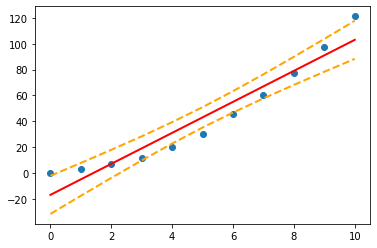

In [96]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T


plt.plot(x, Y, 'o')
plt.plot(x, fittedvalues, '-',color='red', lw=2)
#plt.plot(x, predict_ci_low, '--', color='green',lw=2) #Lower prediction band
#plt.plot(x, predict_ci_upp, '--', color='green',lw=2) #Upper prediction band
#plt.plot(x, predict_mean_ci_low,'--', color='orange',  lw=2) #Lower confidence band
#plt.plot(x, predict_mean_ci_upp,'--', color='orange', lw=2) #Upper confidence band
plt.show()

![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*This notebook was inspired by a several blogposts including:* 

- __"How to Calculate the Bias-Variance Trade-off with Python"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/ <br>
- __"Bias and Variance in Machine Learning – A Fantastic Guide for Beginners!"__ by __PURVA HUILGOL__ available at* https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/ <br>
- __"Prediction Intervals for Machine Learning"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/prediction-intervals-for-machine-learning/ <br>
- __"Confidence and prediction intervals for forecasted values"__ by __Charles Zaiontz__  available at* https://www.real-statistics.com/regression/confidence-and-prediction-intervals/ <br>
- __"3.7 OLS Prediction and Prediction Intervals"__ available at* http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-7-UnivarPredict.html <br>
- __"Using python statsmodels for OLS linear regression"__ available at* https://markthegraph.blogspot.com/2015/05/using-python-statsmodels-for-ols-linear.html <br>

*Here are some great reads on these topics:* 
- __"How to Calculate the Bias-Variance Trade-off with Python"__ available at* https://aidevelopmenthub.com/how-to-calculate-the-bias-variance-trade-off-with-python/ <br>
- __"Understanding the Bias-Variance Tradeoff"__ available at* http://scott.fortmann-roe.com/docs/BiasVariance.html <br>
- __"SCIKIT-LEARN : BIAS-VARIANCE TRADEOFF"__ available at* https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Bias-variance-Tradeoff.php <br>
- __"Linear Regression Confidence Intervals"__ available at* https://rstudio-pubs-static.s3.amazonaws.com/195401_20b3272a8bb04615ae7ee4c81d18ffb5.html <br>
- __"Prediction Interval: Simple Definition, Examples"__ available at* https://www.statisticshowto.com/prediction-interval/ <br>

*Here are some great videos on these topics:* 
- __"Machine Learning Fundamentals: Bias and Variance"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=EuBBz3bI-aA <br>
- __"Bias Variance Trade off"__ by __The Semicolon__ available at* https://www.youtube.com/watch?v=lpkSGTT8uMg <br>
- __"Intervals (for the Mean Response and a Single Response) in Simple Linear Regression"__ by __jbstatistics__ available at* https://www.youtube.com/watch?v=V-sReSM887I <br>
- __"Calculate Confidence and prediction intervals for a response in SLR by hand"__ by __Katie Ann Jager__ available at* https://www.youtube.com/watch?v=JqObYVX1UP0 <br>

## Exercise 1: Ice cream cone baking! <br> 

![](https://s23991.pcdn.co/wp-content/uploads/2020/07/waffle-cones.jpg)   


#### The 'icecreamcone.csv' file,  has the recordings on daily  temperature, relative humidity, cone strength, and cone weight based on noon readings for 20 days of cone making. Follow the steps and answer the following questions:

- Step1: Read the "icecreamcone.csv" file as a dataframe. Explore the dataframe and in a markdown cell breifly describe it in your own words. <br>

- Step2: Calculate and compare the correlation coefficient of the cone's weight with all the other parameters. In a markdown cell, explain the results and state which parameters have the strongest and weakest relationship with the cone's weight of a vehicle. 

- Step3: Use linear regression modeling with statsmodels, get the linear model's coefficients, make a plot and VISUALLY assess the quality of a linear fit with humidity as the predictor, and cone's weight as outcome. Then, use RMSE, Pearson's r, and NSE to describe the performance of your model. Explain the result of this analysis in a markdown cell.

- Step4: Use linear regression modeling with statsmodels, get the linear model's coefficients, make a plot and VISUALLY assess the quality of a linear fit with cone's strength as the predictor, and cone's weight as outcome. Then, use RMSE, Pearson's r, and NSE to describe the performance of your model. Explain the result of this analysis in a markdown cell.

- Step5: Use multiple linear regression modeling with scikit-learn and use all the three predictor parameters to predict cone's weight. Then, use RMSE, Pearson's r, and NSE to describe the performance of your model. Explain the result of this analysis in a markdown cell.

- Step6: As a conclusion, make a statement about the quality of the three predictive models you wrote and compare their performances. 

*Data Source: V.T. Huang, S.T. Luebbers, J.B. Lindamood, P.M.T. Hansen (1989). "Ice Cream Cone Baking: 2. Textured Characteristics of Rolled Sugar Cones," Food Hydrocolloids, Vol. 3, #1, pp. 41-55.*

In [124]:
#Step1:Read the "icecreamcone.csv" file as a dataframe
df = pd.read_csv('icecreamcone.csv')
df.head()


,temp_C,humidity,strength_newtons,weight_g
0,30,67,23.6,11.58
1,29,63,18.1,11.61
2,33,78,18.4,12.04
3,29,62,16.9,12.98
4,28,47,28.6,10.77


In [125]:
# Explore the dataframe: Describe the df
df.describe()

,temp_C,humidity,strength_newtons,weight_g
count,20.000000,20.00000,20.000000,20.000000
mean,28.800000,59.75000,23.685000,11.948000
std,2.166734,7.79254,6.541549,0.645907
min,23.000000,47.00000,14.500000,10.770000
25%,28.000000,53.50000,18.625000,11.602500
50%,29.000000,62.00000,22.950000,11.970000
75%,29.250000,63.00000,25.900000,12.095000
max,33.000000,78.00000,42.300000,13.400000


In [126]:
#Step2: Calculate and compare the correlation coefficient
#What can we infer?
df.corr(method ='pearson') 

,temp_C,humidity,strength_newtons,weight_g
temp_C,1.000000,0.398999,-0.136872,0.070777
humidity,0.398999,1.000000,-0.444978,0.490318
strength_newtons,-0.136872,-0.444978,1.000000,-0.466553
weight_g,0.070777,0.490318,-0.466553,1.000000


In [107]:
temp = np.array(df['temp_C'])
humidity = np.array(df['humidity'])
cstr = np.array(df['strength_newtons'])
cwei = np.array(df['weight_g'])


Intercept    9.519677
humidity     0.040641
dtype: float64


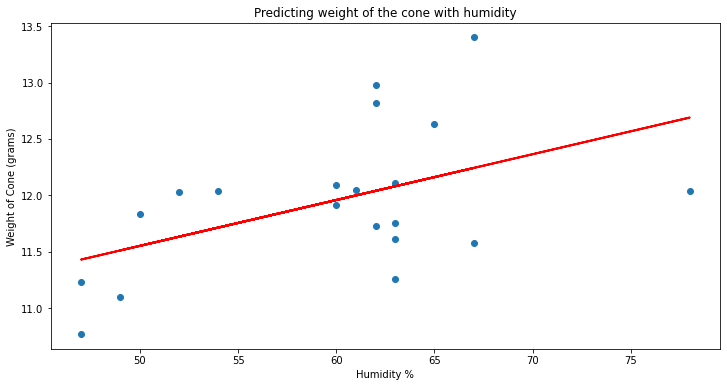

In [108]:
#Step3: humidity as the predictor
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('weight_g ~ humidity', data=df)
model = model.fit()
print(model.params)
# Predict values
hum_pred = model.predict()

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(df['humidity'], df['weight_g'], 'o')           # scatter plot showing actual data
plt.plot(df['humidity'], hum_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Humidity %')
plt.ylabel('Weight of Cone (grams)')
plt.title('Predicting weight of the cone with humidity')

plt.show()

In [112]:
#GOF metrics:
print("RMSE for humidity as predictor is ",np.sqrt(metrics.mean_squared_error(cwei, hum_pred)))

hum_r = pearsonr(hum_pred, cwei)

print("Pearson's r for humidity as predictor is ",hum_r[0])


hum_nse = evaluator(nse, hum_pred, cwei)

print("NSE for humidity as predictor is ",hum_nse)


RMSE for TV ad spendings as predictor is  0.5486823021467498
Pearson's r for TV ad spendings as predictor is  0.4903177516624605
NSE for TV ad spendings as predictor is  [0.2404115]


Intercept           13.039098
strength_newtons    -0.046067
dtype: float64


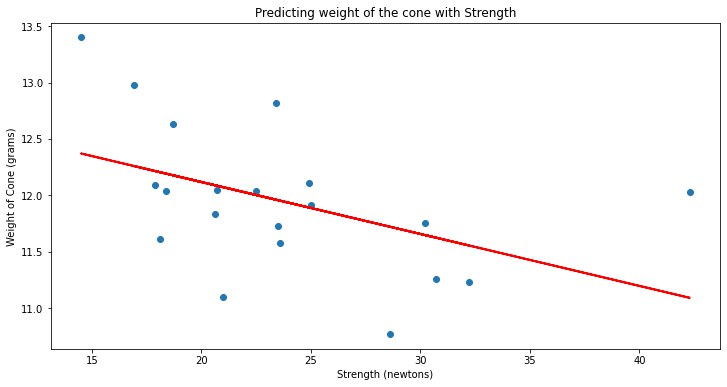

In [114]:
#Step4: strength as the predictor

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('weight_g ~ strength_newtons', data=df)
model = model.fit()
print(model.params)
# Predict values
str_pred = model.predict()

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(df['strength_newtons'], df['weight_g'], 'o')           # scatter plot showing actual data
plt.plot(df['strength_newtons'], str_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Strength (newtons)')
plt.ylabel('Weight of Cone (grams)')
plt.title('Predicting weight of the cone with Strength')

plt.show()

In [115]:
#GOF metrics:
print("RMSE for cone strength as predictor is ",np.sqrt(metrics.mean_squared_error(cwei, str_pred)))

str_r = pearsonr(str_pred, cwei)

print("Pearson's r for cone strength as predictor is ",str_r[0])


str_nse = evaluator(nse, str_pred, cwei)

print("NSE for cone strength as predictor is ",str_nse)


RMSE for cone strength as predictor is  0.556834689284976
Pearson's r for cone strength as predictor is  0.46655299243080156
NSE for cone strength as predictor is  [0.21767169]


In [122]:
#Step5: 3 predictor - Multiple Linear Regression

from sklearn.linear_model import LinearRegression

# Build linear regression model using TV,Radio and Newspaper as predictors
# Split data into predictors X and output Y
predictors = ['temp_C', 'humidity', 'strength_newtons']
X = df[predictors]
y = df['weight_g']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

# Predict values
big_pred = model.predict(X)

In [123]:
#GOF metrics:

print("RMSE for temperature, humidity, and cone strength as predictor is ",np.sqrt(metrics.mean_squared_error(cwei, big_pred)))

big_r = pearsonr(big_pred, cwei)

print("Pearson's r for temperature, humidity, and cone strength as predictor is ",big_r[0])


big_nse = evaluator(nse, big_pred, cwei)

print("NSE for temperature, humidity, and cone strength as predictor is ",big_nse)


RMSE for temperature, humidity, and cone strength as predictor is  0.5144035327487767
Pearson's r for temperature, humidity, and cone strength as predictor is  0.5765040355193987
NSE for temperature, humidity, and cone strength as predictor is  [0.3323569]


In [ ]:
#Step6:

![](https://img.libquotes.com/pic-quotes/v4/bruce-willis-quote-lby1n5v.jpg) <br>
